In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data Visualization & Inspection

In [13]:
path = r"C:\Users\Lucas\Desktop\Fall 2023\ECE-GY 6123 Image and Video Processing\Project\360-FoV-prediction\src\data\mvm\GuoYushan_Pulling_trolley.txt"

data = []
with open(path, "r", encoding='utf-8') as fr:
    columns = fr.readline().strip().split(', ')
    for line in fr.readlines(): #add [1:] if skip first line:
        data.append(list(map(lambda x: float(x), line.split(' '))))
data = np.array(data)
print(data.shape)

df = pd.DataFrame(data, columns=columns)
df.set_index('#Frame', inplace=True)
print(df)

(5580, 28)
            Timer     HeadX     HeadY     HeadZ    HeadRX    HeadRY    HeadRZ  \
#Frame                                                                          
1.0      0.006175  0.842126  1.445682  0.648443  33.30764  278.1237  7.761346   
2.0      0.019671  0.842669  1.445864  0.649194  33.19837  278.2906  7.707903   
3.0      0.030022  0.843812  1.446070  0.650829  33.17386  278.7114  7.704049   
4.0      0.036558  0.844352  1.446160  0.651625  33.15320  278.8926  7.669194   
5.0      0.041864  0.844763  1.446458  0.652473  33.11271  279.0507  7.674412   
...           ...       ...       ...       ...       ...       ...       ...   
5576.0  38.727230  0.707686  1.401511  0.790135  47.64930  266.0537  4.256692   
5577.0  38.735980  0.707017  1.401105  0.790450  47.73724  265.9126  4.086886   
5578.0  38.741310  0.706820  1.400291  0.791031  47.81570  265.7630  3.911327   
5579.0  38.750020  0.706588  1.399732  0.791295  47.89937  265.6984  3.704072   
5580.0  38.755140

0.23608085895445743 -0.6942613666738432 0.6799021861852579
-0.865942512941017 0.2297299102610058 0.4442608835052516
0.6961369259672678 -0.6095226860169014 0.37930920834536086
-0.414267333747639 0.8809654692303852 0.22865348939674984
0.578135605224855 -0.6733418198499727 0.46083621343424996
0.10173649901920773 -0.7659874198802739 0.6347542495741764
-0.2553264209037625 -0.773339505540484 0.5803054609073349
-0.6455839608114151 -0.45957825447600037 0.6099255508304583
-0.3221872086140326 -0.7624343680069436 0.5611499238949875
0.13407690301888134 -0.8049051527106881 0.5780580240915694
-0.14890131321166447 -0.9837047428507222 0.10076397082705801
-0.8660397688513443 -0.43528668899809386 0.24596873205549272
-0.9922953329824413 0.1182467691419565 -0.03698207307270111
0.5428617086396588 0.7847650894824026 0.29907343516686113
-0.7919330001996081 0.41638436906464005 -0.44661636825522755
-0.968635909210271 -0.05037755209883712 0.24332401778887489
0.15608650255434967 -0.8357671578963036 0.52643163041

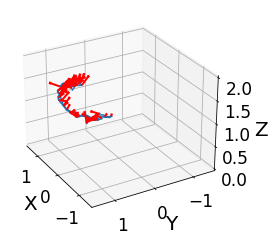

In [12]:
gaze_directions = np.stack(df.apply(lambda row: [row['REyeRX'], row['REyeRY'], row['REyeRZ']], axis=1).values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot head positions with Y as the vertical axis
ax.plot(df['HeadX'], df['HeadZ'], df['HeadY'], label='Head Movement Trajectory')

ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(0, 2)


# Plot gaze directions with Y as the vertical axis
for head_position, gaze_direction in zip(df[['HeadX', 'HeadZ', 'HeadY']].values[::100], gaze_directions[::100]):

    yaw = gaze_direction[1] * np.pi / 180
    pitch = gaze_direction[0] * np.pi / 180

    x = np.cos(yaw) * np.cos(pitch)
    y = np.sin(yaw) * np.cos(pitch)
    z = np.sin(pitch)

    print(x, y, z)

    #ax.quiver(*head_position, x, y, z, length=0.36, normalize=True, color='r', arrow_length_ratio=0.5,linewidth=2)
    ax.quiver(*head_position, x, y, z, length=0.25, normalize=True, color='r', arrow_length_ratio=0.2, linewidth=2)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.tick_params(axis='z', labelsize=17)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)


#ax.set_box_aspect([1,1,0.5])

# ax.grid(True)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

# ax.set_title('Head Movement Trajectory and Gaze Direction')
ax.view_init(elev=27, azim=150)
plt.show()

